### **Title**

Medical Q&A Chatbot Using MedQuAD Dataset 

### **Objective**
The Objective Of This Project Is Develop a Retrieval-Based Medical Question-Answering
Chatbot Using MedQuAD Dataset. The System Retrieves Relevant Medical Answers Using 
TF-IDF similarity and provides basic medical entity recognition.

## **Importing** All The Esstinal Libraries

In [ ]:
import streamlit as st
import json 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

## **Loading** The Dataset 

In [4]:
with open("data\medquad.json", "r", encoding="utf-8") as f:
    data = json.load(f)

print("Total Q&A pairs:", len(data))
data[:2]

Total Q&A pairs: 5492


[{'question': 'What are the treatments for Adult Acute Lymphoblastic Leukemia ?',
  'answer': 'Key Points\n                    - There are different types of treatment for patients with adult ALL.     - The treatment of adult ALL usually has two phases.    - Four types of standard treatment are used:          - Chemotherapy      - Radiation therapy      - Chemotherapy with stem cell transplant     - Targeted therapy         - New types of treatment are being tested in clinical trials.          - Biologic therapy        - Patients may want to think about taking part in a clinical trial.    - Patients can enter clinical trials before, during, or after starting their cancer treatment.    - Patients with ALL may have late effects after treatment.    - Follow-up tests may be needed.\n                \n                \n                    There are different types of treatment for patients with adult ALL.\n                    Different types of treatment are available for patients with adul

## Dataset Description
The MedQuAD dataset consists of expert-curated medical question-answer pairs collected
from trusted medical sources such as NIH, CDC, and CancerGov.

## Text Precessing 
Text preprocessing includes:
- Lowercasing text
- Removing special characters
- Tokenization
- Lemmatization

This helps normalize text and improves similarity-based retrieval.

## **TF-IDF** Vectorization Is Use For Knowing How Important a Word In Dataset

In [5]:
questions = [item["question"] for item in data]

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
question_vectors = vectorizer.fit_transform(questions)
 
question_vectors.shape

(5492, 5000)

### This Below Is Example Of How We Retrieve Answer From Question 

In [6]:
query = "What are the symptoms of cancer?"
query_vector = vectorizer.transform([query])

similarities = cosine_similarity(question_vectors,query_vector)[0]
best_index = similarities.argmax()

print("Query:", query)
print("Retrieved Answer:", data[best_index]["answer"][:300])

Query: What are the symptoms of cancer?
Retrieved Answer: Key Points
                    - There are different types of treatment for patients with adult ALL.     - The treatment of adult ALL usually has two phases.    - Four types of standard treatment are used:          - Chemotherapy      - Radiation therapy      - Chemotherapy with stem cell transplant


# **Visual** The Output

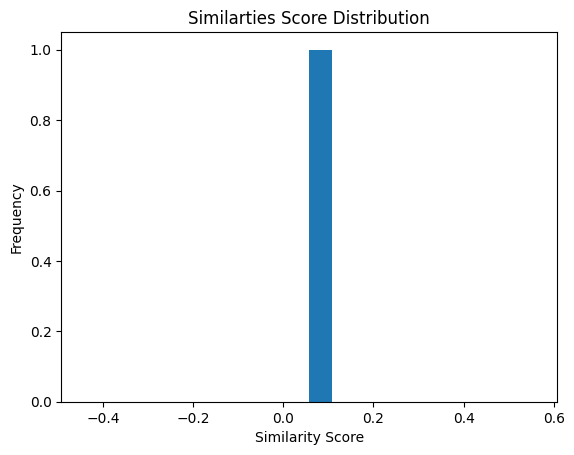

In [7]:
plt.hist(similarities,bins=20)
plt.title("Similarties Score Distribution")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

## **entity_recognition.py** 

Basic medical entity recognition is implemented using rule-based keyword matching.
Entities such as diseases, symptoms and treatments  are detected from user queries
to improve explainability



## **Limitations**

- The System relies on text similarity and does not generate new medical answers.
- Entity recognition is rule-based and limited to predefined keywords.
- retrieval quality depends on dataset coverage.

## **Conclusion**

This Notebook demonstrates a retrieval-based Medical Q&A chatbot using the MedQuAD
Dataset. The Approach Ensures Safe And Reliable Answer By Retrieving Expert-Verified
Medical Information